# CAP 6618 - Machine Learning for Computer Vision

## Project 1: Digit Classification Using Machine Learning
Design and implement a complete solution to the problem of handwritten digit recognition, stated as follows: “given an image of a handwritten digit, produce the corresponding numerical value.” Essentially, you will build, fine-tune, and evaluate a 10-class classifier which will employ the pixel values of the images as features.
DO NOT use Neural Network (next project)

### Educational Objectives
* Learn how to implement a Machine Learning workflow in Python (using scikit-learn, matplotlib, and numpy)
* Get acquainted with representative contemporary datasets and problems in image analysis and machine learning
* Learn how to implement a machine learning model in Python (using scikit-learn, matplotlib, and numpy)
* Learn how to evaluate and fine-tune the performance of a model using cross-validation
* Learn how to test a model and produce a set of plots, performance measures, and results that can be compared against other groups / classmates

# Step 1: Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Shared Methods

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    """ Method to save figures to your local computer"""
    image_dir = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)

    path = os.path.join(image_dir, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
def plot_confusion_matrix(matrix):
    """ Method to plot confusion matrix"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [4]:
def plot_digits(instances, images_per_row=10, **options):
    """ Method to plot sample digits"""
    size = 28
    
    # If there are instances, plot them
    if(len(instances)):
        images_per_row = min(len(instances), images_per_row)
        images = [instance.reshape(size,size) for instance in instances]
        n_rows = (len(instances) - 1) // images_per_row + 1
        row_images = []
        n_empty = n_rows * images_per_row - len(instances)
        images.append(np.zeros((size, size * n_empty)))
        for row in range(n_rows):
            rimages = images[row * images_per_row : (row + 1) * images_per_row]
            row_images.append(np.concatenate(rimages, axis=1))
        image = np.concatenate(row_images, axis=0)
        plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    # Else, plot an empty plot
    else:
        empty_array = np.zeros((5, 5))
        plt.imshow(empty_array, cmap = matplotlib.cm.binary, **options)
    
    plt.axis("off")

# Step 2: Load the MNIST dataset

In [5]:
def sort_by_target(mnist):
    """ Method to sort the MNIST if load using fetch_openml"""
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
# https://scikit-learn.org/0.19/datasets/mldata.html

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8)    # fetch_openml() returns targets as strings
    sort_by_target(mnist)                          # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
    mnist["data"], mnist["target"]

In [7]:
mnist.data.shape

(70000, 784)

In [8]:
# X is the digit image and y is the class label
X, y = mnist["data"], mnist["target"]

# Step 3: Visualize the MNIST dataset

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

Saving figure digit_sample_plot


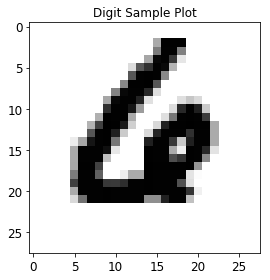

In [11]:
# Plot a random digit sample
some_digit_index = 40000
some_digit = X[some_digit_index]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")

plt.title("Digit Sample Plot")
#plt.axis("off")

save_fig("digit_sample_plot")
plt.show()

In [12]:
# Print the sample digit's label
print('The ground truth label for the sample digit above is: ', y[some_digit_index])

The ground truth label for the sample digit above is:  6


# Step 4: Split the dataset

In [13]:
# Split dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
# Random shuffle
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Step 5: Classification using the SGD Classifier with Default Parameters

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.linear_model import SGDClassifier

# SGD Classifier
sgd_clf = SGDClassifier(max_iter=15, tol=-np.infty, random_state=42, penalty="l1")
sgd_clf.fit(X_train, y_train)

# Note:
# 1. Required to set 'tol' if set 'max_iter' (Warning)
# 2. Set 'random_state' since shuffling is True by default
# 3. Set 'pentalty' to l1 to shrinks model parameters towards the zero vector with absolute norm L1 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=15,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
# Test the model by making a prediction the sample digit
some_digit_predicted = sgd_clf.predict([some_digit])
print("The predicted class for the sample digit is",some_digit_predicted[0])

The predicted class for the sample digit is 6


In [17]:
# Inspect decision function
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-19707756.95723801, -40340406.45555584,  -4204954.47451782,
         -5299245.4437812 , -11186924.64560927,  -5665610.53771423,
          1229707.86536847, -15253415.95343225,  -4345059.79330357,
         -6642277.3408977 ]])

In [18]:
# Select (the index of the) max value among scores
np.argmax(some_digit_scores)

6

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# Evaluate a score by cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.89117177, 0.89049452, 0.88608291])

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Generate cross-validated estimates for each input data point then compute the confusion matrix 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5662,    0,   30,   18,    9,   18,   30,    5,  139,   12],
       [   2, 6449,   49,   21,    6,   23,    9,    8,  151,   24],
       [  45,   60, 5202,  126,   58,   25,   95,   64,  268,   15],
       [  33,   27,  198, 5213,   10,  171,   18,   50,  328,   83],
       [  17,   19,   56,   23, 5280,   25,   34,   21,  179,  188],
       [  76,   20,   44,  243,   65, 4333,  131,   16,  423,   70],
       [  36,   13,   58,   16,   35,   83, 5555,    6,  116,    0],
       [  34,   16,   75,   33,   51,   15,    6, 5661,  108,  266],
       [  42,   72,  117,  183,   41,  215,   44,   20, 4981,  136],
       [  28,   41,   18,   76,  245,   70,    1,  207,  244, 5019]],
      dtype=int64)

Saving figure confusion_matrix_SGDClassifier


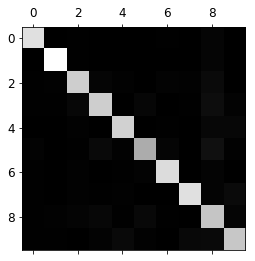

In [21]:
# Plot the result confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_SGDClassifier", tight_layout=False)
plt.show()

Saving figure confusion_matrix_errors_SGDClassifier


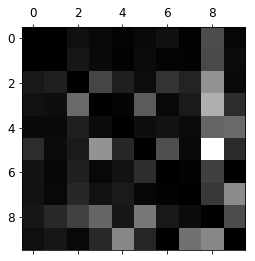

In [22]:
# Plot the confusion matrix errors (the lighter the block, the more errors)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_SGDClassifier", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_SGDClassifier


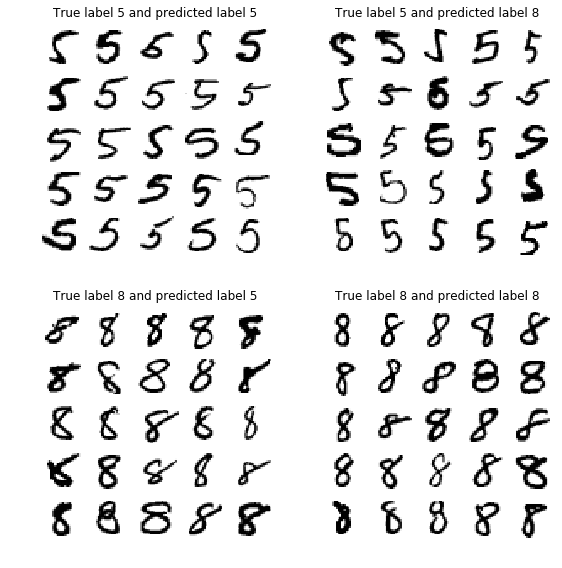

In [23]:
# Based on the confusion matrix, the model seem to make the most mistakes
# when classifying digits with true label i but predict them to be j

# https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html
i,j = np.unravel_index(norm_conf_mx.argmax(), norm_conf_mx.shape)

cl_a, cl_b = i, j
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221).set_title('True label '+ str(i) + ' and predicted label '+ str(i)); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222).set_title('True label '+ str(i) + ' and predicted label '+ str(j)); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223).set_title('True label '+ str(j) + ' and predicted label '+ str(i)); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224).set_title('True label '+ str(j) + ' and predicted label '+ str(j)); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_SGDClassifier")
plt.show()

In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score

# Evaluate accuracy on test set
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8955

# Step 6: Classification using RandomForest Classifier with Data Normalization / Standardization, Data Augmentation, and Hyperparameters Optimization

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier with Default parameters
forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest_clf.fit(X_train, y_train)

# Note: 
# 1. 'n_estimators' is set due to a FutureWarning
# 2. 'random_state' is set since it controls the randomness of the bootstrapping of the samples used when building trees 
#    and 'bootstrap' is True by default

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
# Test the model by making a prediction the sample digit
some_digit_predicted = forest_clf.predict([some_digit])
print("The predicted class for the sample digit is",some_digit_predicted[0])

The predicted class for the sample digit is 6


In [27]:
# Predict class probabilities for X
forest_clf.predict_proba([some_digit])

array([[0.02, 0.  , 0.06, 0.  , 0.02, 0.  , 0.89, 0.01, 0.  , 0.  ]])

In [28]:
# Evaluate a score by cross-validation
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96545691, 0.96539827, 0.96549482])

In [29]:
# Generate cross-validated estimates for each input data point then compute the confusion matrix 
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5844,    1,    9,    1,    6,    7,   19,    1,   33,    2],
       [   1, 6638,   34,   18,   14,    2,    6,   16,   10,    3],
       [  23,   11, 5760,   27,   33,    4,   20,   36,   37,    7],
       [  10,    6,   89, 5810,    1,   66,    4,   52,   63,   30],
       [  11,   13,   10,    0, 5655,    1,   30,    9,   13,  100],
       [  22,    7,   12,   63,   10, 5195,   44,    6,   36,   26],
       [  29,   10,    4,    0,   13,   44, 5802,    0,   16,    0],
       [   6,   23,   57,    7,   36,    0,    0, 6046,   10,   80],
       [  10,   29,   34,   46,   29,   51,   28,    7, 5550,   67],
       [  24,   10,   14,   81,   73,   18,    4,   53,   45, 5627]],
      dtype=int64)

Saving figure confusion_matrix_RandomForestClassifier


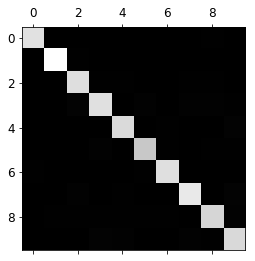

In [30]:
# Plot the result confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_RandomForestClassifier", tight_layout=False)
plt.show()

Saving figure confusion_matrix_errors_RandomForestClassifier


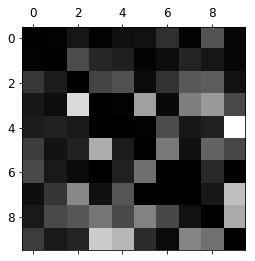

In [31]:
# Plot the confusion matrix errors (the lighter the block, the more errors)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_RandomForestClassifier", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_RandomForestClassifier


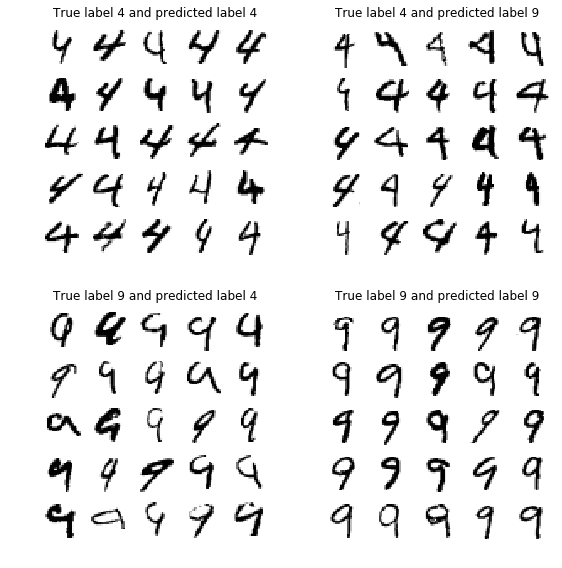

In [32]:
# Based on the confusion matrix, the model seem to make the most mistakes
# when classifying digits with true label i but predict them to be j

i,j = np.unravel_index(norm_conf_mx.argmax(), norm_conf_mx.shape)

cl_a, cl_b = i, j
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221).set_title('True label '+ str(i) + ' and predicted label '+ str(i)); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222).set_title('True label '+ str(i) + ' and predicted label '+ str(j)); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223).set_title('True label '+ str(j) + ' and predicted label '+ str(i)); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224).set_title('True label '+ str(j) + ' and predicted label '+ str(j)); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_RandomForestClassifier")
plt.show()

In [33]:
# Evaluate accuracy on test set
y_pred = forest_clf.predict(X_test)
forest_clf_DEFAULT_score = accuracy_score(y_test, y_pred)
print("Accuracy score for the Random Forest classifier with default parameters", forest_clf_DEFAULT_score) 

Accuracy score for the Random Forest classifier with default parameters 0.9697


### Data normalization / Standardization on Default Random Forest Classifier

In [34]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
# https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

standardized_forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
standardized_forest_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
# Evaluate a score by cross-validation
cross_val_score(standardized_forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.96560688, 0.96549827, 0.96539481])

In [36]:
# Generate cross-validated estimates for each input data point then compute the confusion matrix 
y_train_pred = cross_val_predict(standardized_forest_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5844,    1,    9,    1,    6,    7,   19,    1,   33,    2],
       [   1, 6638,   35,   17,   14,    2,    6,   16,   10,    3],
       [  23,   11, 5761,   27,   33,    4,   20,   35,   37,    7],
       [  10,    6,   89, 5808,    1,   67,    4,   53,   63,   30],
       [  11,   13,   10,    0, 5656,    1,   30,    9,   13,   99],
       [  22,    7,   12,   63,   11, 5194,   44,    5,   37,   26],
       [  29,   10,    4,    0,   12,   44, 5803,    0,   16,    0],
       [   6,   23,   57,    7,   36,    0,    0, 6048,   10,   78],
       [  10,   29,   34,   46,   29,   51,   28,    7, 5551,   66],
       [  23,   10,   14,   82,   73,   18,    4,   54,   44, 5627]],
      dtype=int64)

In [37]:
# Evaluate accuracy on test set for the normalized/standardized
y_pred_scaled = standardized_forest_clf.predict(X_test_scaled)
forest_clf_STANDARDIZED_score = accuracy_score(y_test, y_pred_scaled)
print("Accuracy score for the default Random Forest with data normalization/standardization", forest_clf_STANDARDIZED_score) 

Accuracy score for the default Random Forest with data normalization/standardization 0.9695


### Data Augmentation techniques on Default Random Forest Classifier

Data Augmentation options: 
* Image rotation: Not viable since 6 and 9 can get mixed up
* Image zoom / padding: Already big enough so can't really zoom and crop anymore
* Image shifting: Adapted from https://towardsdatascience.com/improving-accuracy-on-mnist-using-data-augmentation-b5c38eb5a903
* Image shift in hue (small): Unless using Tensorflow library (https://www.tensorflow.org/api_docs/python/tf/image/adjust_hue)

In [38]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    """Method to shift the image by given dimension"""
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0)):
     for image, label in zip(X_train, y_train):
            X_train_augmented.append(shift_image(image, dx, dy))
            y_train_augmented.append(label)

In [39]:
# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

In [40]:
# Training on augmented dataset
forest_clf_augmented = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest_clf_augmented.fit(X_train_augmented, y_train_augmented)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [41]:
# Evaluating the model
y_pred_augmented = forest_clf_augmented.predict(X_test)
forest_clf_AUGMENTED_score = accuracy_score(y_test, y_pred_augmented)
print("Accuracy score for the Default Random Forest with data augmentation", forest_clf_AUGMENTED_score) 

Accuracy score for the Default Random Forest with data augmentation 0.9722


### Hyperparameters Optimization on Default Random Forest Classifier
https://scikit-learn.org/stable/modules/grid_search.html

In [42]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Chosen parameters for optimization
parameters = {'n_estimators': [10, 25, 50, 100], 
              'criterion': ['gini', 'entropy']}

In [43]:
            ###  Exhaustive Grid Search ###

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

forest_clf_GridSearchCV = GridSearchCV(forest_clf, parameters, scoring='accuracy', cv=3)
forest_clf_GridSearchCV.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 25, 50, 100], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [44]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

print("Best parameters set found on development set:", forest_clf_GridSearchCV.best_params_)

print("\nGrid scores on development set:")
means = forest_clf_GridSearchCV.cv_results_['mean_test_score']
stds = forest_clf_GridSearchCV.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, forest_clf_GridSearchCV.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on development set: {'criterion': 'entropy', 'n_estimators': 100}

Grid scores on development set:
0.940 (+/-0.001) for {'criterion': 'gini', 'n_estimators': 10}
0.957 (+/-0.000) for {'criterion': 'gini', 'n_estimators': 25}
0.963 (+/-0.001) for {'criterion': 'gini', 'n_estimators': 50}
0.965 (+/-0.000) for {'criterion': 'gini', 'n_estimators': 100}
0.942 (+/-0.001) for {'criterion': 'entropy', 'n_estimators': 10}
0.958 (+/-0.001) for {'criterion': 'entropy', 'n_estimators': 25}
0.963 (+/-0.002) for {'criterion': 'entropy', 'n_estimators': 50}
0.966 (+/-0.001) for {'criterion': 'entropy', 'n_estimators': 100}


In [45]:
            ### Randomized Parameter Optimization ###

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV
from time import time

n_iter_search = 5
forest_clf_RandomizedSearchCV = RandomizedSearchCV(forest_clf, param_distributions = parameters,
                                                   n_iter = n_iter_search, cv=3)

start = time()
forest_clf_RandomizedSearchCV.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 202.05 seconds for 5 candidates parameter settings.


In [46]:
print("Best parameters set found on development set:", forest_clf_RandomizedSearchCV.best_params_)

print("\nGrid scores on development set:")
means = forest_clf_RandomizedSearchCV.cv_results_['mean_test_score']
stds = forest_clf_RandomizedSearchCV.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, forest_clf_RandomizedSearchCV.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on development set: {'n_estimators': 100, 'criterion': 'entropy'}

Grid scores on development set:
0.942 (+/-0.001) for {'n_estimators': 10, 'criterion': 'entropy'}
0.963 (+/-0.002) for {'n_estimators': 50, 'criterion': 'entropy'}
0.958 (+/-0.001) for {'n_estimators': 25, 'criterion': 'entropy'}
0.940 (+/-0.001) for {'n_estimators': 10, 'criterion': 'gini'}
0.966 (+/-0.001) for {'n_estimators': 100, 'criterion': 'entropy'}


### Random Forest with normalization/standardization, data augmentation, and hyperparameters otimization

In [47]:
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.pipeline import Pipeline

forest_clf_BEST_pipe = Pipeline([('scaler', StandardScaler()),
                                ('rfc', RandomForestClassifier(**forest_clf_GridSearchCV.best_params_))])

forest_clf_BEST_pipe

# Note: 'forest_clf_GridSearchCV.best_estimator_' come from Hyperparameters Optimization section

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
  ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [48]:
# Train the classifier
forest_clf_BEST_pipe.fit(X_train_augmented, y_train_augmented)

# Note: 'X_train_augmented' and 'y_train_augmented' come from Data Augmentation section 
#        StandardScaler is in the Pipeline already 

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
  ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [49]:
# Get the score for the classifier
forest_clf_BEST_score = forest_clf_BEST_pipe.score(X_test, y_test)
print("Accuracy score for the Random Forest with normalization/standardization,")
print("data augmentation, and hyperparameters otimization:\t", forest_clf_BEST_score)

Accuracy score for the Random Forest with normalization/standardization,
data augmentation, and hyperparameters otimization:	 0.9746


### Classifiers Results

In [50]:
print("Random Forest classifier with default parameters:\t", forest_clf_DEFAULT_score) 
print("\nDefault Random Forest with data normalization/standardization:\t", forest_clf_STANDARDIZED_score)
print("\nDefault Random Forest with data augmentation:\t", forest_clf_AUGMENTED_score) 
print("\nRandom Forest with normalization/standardization, data augmentation, and hyperparameters otimization:\t", forest_clf_BEST_score)

Random Forest classifier with default parameters:	 0.9697

Default Random Forest with data normalization/standardization:	 0.9695

Default Random Forest with data augmentation:	 0.9722

Random Forest with normalization/standardization, data augmentation, and hyperparameters otimization:	 0.9746
